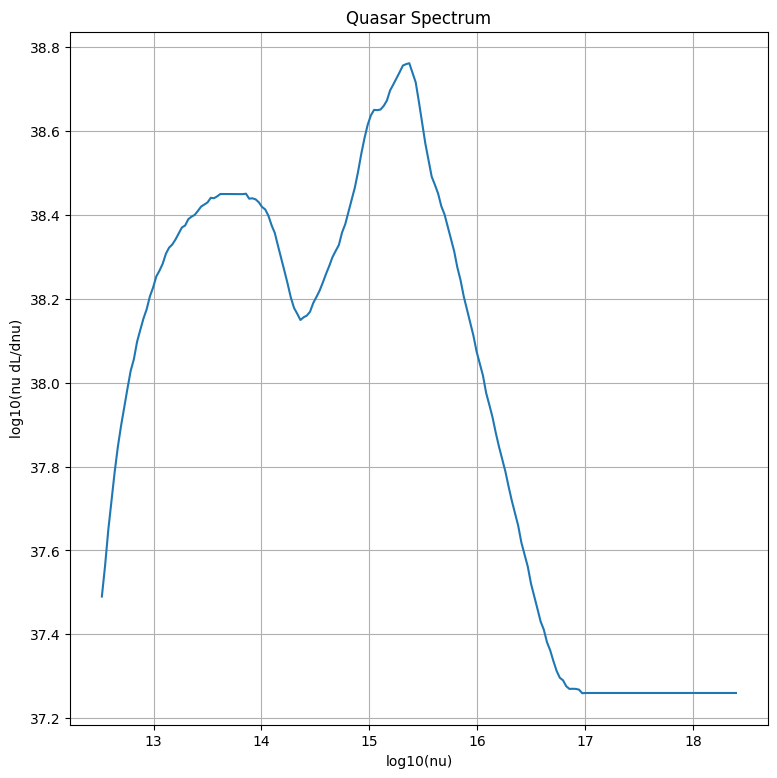

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Loading quasar spectrum data

filename = "quasar_spectrum.txt"
quasar_data = np.loadtxt(filename)

x_lognu = quasar_data[:, 0]     # log10(nu) already in log scale
y_logL = quasar_data[:, 1]      # log10(nu dL/dnu) already in log scale

# -------------------------------------------------
# Plot spectrum
# -------------------------------------------------
plt.figure(figsize=(9, 9))
plt.plot(x_lognu, y_logL)
plt.xlabel("log10(nu)")
plt.ylabel("log10(nu dL/dnu)")
plt.title("Quasar Spectrum")
plt.grid()
plt.savefig("test_plot.png", dpi=200)
plt.show()




In [5]:
# 2) Numerical integration of quasar spectrum

# Convert from log to linear for integration
lum_linear = (10**log_lum) * np.log(10)

# trapezoid integration
def trapezoid_integrator(x, f):
    total_area = 0.0
    for i in range(len(x) - 1):
        dx = x[i+1] - x[i]
        total_area += 0.5 * dx * (f[i] + f[i+1])
    return total_area


    # If number of intervals is odd, use trapezoid on last interval
    if N % 2 != 0:
        dx = x[-1] - x[-2]
        integral += 0.5 * dx * (f[-1] + f[-2])
        N -= 1


L_trap = trapezoid_integrator(log_freq, lum_linear)

print("Numerical Integration Results:")
print(f"Trapezoidal Method Luminosity: {L_trap:.6e} W")


Numerical Integration Results:
Trapezoidal Method Luminosity: 2.194090e+39 W


In [10]:
# 3) Total luminosity and relative error


# True luminosity
L_true = 2.193736e39  # W

# Integrations over full spectrum
L_total_trap = trapezoid_integrator(log_freq, lum_linear)

# Relative error function
def rel_err(L_calc, L_ref):
    return abs(L_calc - L_ref) / L_ref

# Results
print("Total Quasar Luminosity")

print(f"Trapezoidal Rule Result: {L_total_trap:.6e} W")
print(f"Relative Error: {rel_err(L_total_trap, L_true)*100:.4f} %\n")
print("yey")


Total Quasar Luminosity
Trapezoidal Rule Result: 2.194090e+39 W
Relative Error: 0.0161 %

yey


In [12]:
# 4) Visible luminosity

# Physical constant
c = 3.0e8  # speed of light (m/s)

# Visible wavelength range (meters)
lambda_min = 400e-9   # 400 nm
lambda_max = 700e-9   # 700 nm

# Convert wavelength range to frequency range
nu_max = c / lambda_min  
nu_min = c / lambda_max  

# Convert to log10 space
log_nu_min = np.log10(nu_min)
log_nu_max = np.log10(nu_max)

# Select visible part of spectrum
visible_mask = (log_freq >= log_nu_min) & (log_freq <= log_nu_max)

log_freq_vis = log_freq[visible_mask]
lum_vis = lum_linear[visible_mask]

# Integrate visible luminosity with trapezoid
L_visible = trapezoid_integrator(log_freq_vis, lum_vis)

# Fraction of total luminosity
visible_fraction = L_visible / L_total_trap

# Output
print("Visible Spectrum Luminosity")
print(f"Visible Luminosity: {L_visible:.6e} W")
print(f"Fraction of Total Luminosity: {visible_fraction*100:.4f} %")


Visible Spectrum Luminosity
Visible Luminosity: 1.135216e+38 W
Fraction of Total Luminosity: 5.1740 %
